In [1]:
# load the packages needed
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from src.solver import Solver
from src.model import AR, MA
import src.data_processor as dp
import src.inference as inf
from src.ts_gen import ar1_gen
data = np.loadtxt("../data/GOOG.csv", delimiter=',')

In [2]:
X = np.array([data[0:100]])
Y = dp.get_return(X)

In [3]:
lag = 5
sigma = 1.0
intercept = 0.1
phi = np.array([[ 0.04560256],
        [ 0.0535601 ],
        [-0.78190871],
        [ 1.30062633],
        [ 0.46616754]])
AR_model = AR(lag=lag, phi=phi, sigma=sigma, intercept=intercept)
AR_model.params

{'intercept': 0.1, 'phi': array([[ 0.04560256],
        [ 0.0535601 ],
        [-0.78190871],
        [ 1.30062633],
        [ 0.46616754]]), 'sigma': 1.0}

In [4]:
_, grads = AR_model.loss(Y)
solver = Solver(AR_model, Y,
                          update_rule='sgd_momentum',
                          optim_config={
                            'learning_rate': 1e-6,
                          },
                          
                          num_epochs=10000, batch_size=1,
                          print_every=10)
solver.train()

10000
the loss is 86.566144
the loss is 85.883621
the loss is 85.059396
the loss is 84.174521
the loss is 83.256735
the loss is 82.315231
the loss is 81.352711
the loss is 80.369586
the loss is 79.365436
the loss is 78.339511
the loss is 77.290909
the loss is 76.218632
the loss is 75.121597
the loss is 73.998645
the loss is 72.848528
the loss is 71.669908
the loss is 70.461345
the loss is 69.221287
the loss is 67.948060
the loss is 66.639851
the loss is 65.294697
the loss is 63.910465
the loss is 62.484833
the loss is 61.015266
the loss is 59.498990
the loss is 57.932961
the loss is 56.313829
the loss is 54.637897
the loss is 52.901068
the loss is 51.098788
the loss is 49.225977
the loss is 47.276941
the loss is 45.245272
the loss is 43.123726
the loss is 40.904067
the loss is 38.576880
the loss is 36.131338
the loss is 33.554905
the loss is 30.832954
the loss is 27.948286
the loss is 24.880485
the loss is 21.605075
the loss is 18.092364
the loss is 14.305873
the loss is 10.200102
the 

In [5]:
AR_model.params

{'intercept': array([ 0.00019801]), 'phi': array([[ 0.04563594],
        [ 0.05349392],
        [-0.78162069],
        [ 1.29967032],
        [ 0.46572242]]), 'sigma': array([ 0.01330691])}

In [6]:
a, b = inf.yule_walker(Y, order =5,method='unbiased')
print a
print b

[ 0.06259647 -0.01382356 -0.13006426  0.02377511 -0.03743078]
0.000174892456335


In [7]:
rt = AR_model.predict(Y,20)
print rt
pred_price = dp.get_price(X[0,99],rt)
print pred_price
print data[100:120]

import src.trading as tr
tr.signal_generation(pred_price,5)

[[ 0.01298862  0.00986327 -0.0304309   0.00070577  0.01430938  0.0435423
  -0.03255767 -0.02339814 -0.01771882  0.08684032 -0.00053395 -0.02690424
  -0.1028602   0.09909376  0.05999628  0.05341926 -0.21782271  0.02710565
   0.07215478  0.27256462]]
[[ 546.80112608  552.19437202  535.39059795  535.76846045  543.43497408
   567.09738112  548.6340089   535.79699612  526.30330698  572.00765375
   571.70222812  556.32101632  499.09772458  548.55519365  581.46646337
   612.52797113  479.10547121  492.09193815  527.59872308  671.40346828]]
[ 539.78  532.11  533.99  539.18  540.31  536.7   533.33  526.83  526.69
  536.69  534.61  532.33  527.2   528.15  529.26  536.73  536.69  538.19
  540.48  537.84]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  1.,
         0., -1.,  0.,  1.,  0.,  0., -1.]])

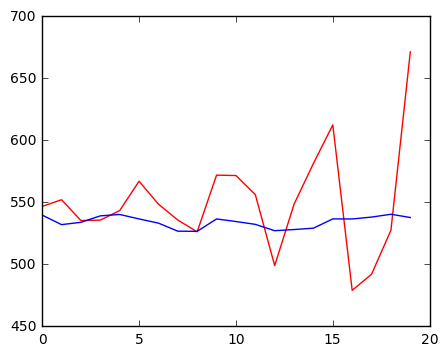

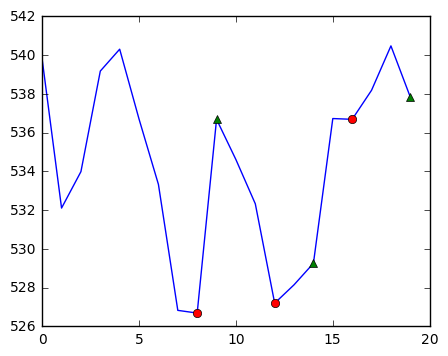

In [8]:

import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import src.trading as tr
signal=tr.signal_generation(pred_price,5)

plt.plot(pred_price[0,:],'r')
plt.plot(data[100:120],'b')
plt.hold(True)

plt.show()

plt.figure()
plt.plot(data[100:120],'b')
for i in range(20):
    if signal[0,i]==1:
        plt.plot(i,data[100+i], 'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[100+i], 'g^')


In [9]:
import src.trading as tr
profit = tr.trade(X,np.array([data[100:120]]),AR_model,20,5,100)
print profit

[[ 100.          100.          100.          100.          100.          100.
   100.          100.          100.          101.89865006  101.89865006
   101.89865006  101.89865006  102.08226864  102.29681246  102.29681246
   102.29681246  102.5827228   103.01921258  102.51601039]]


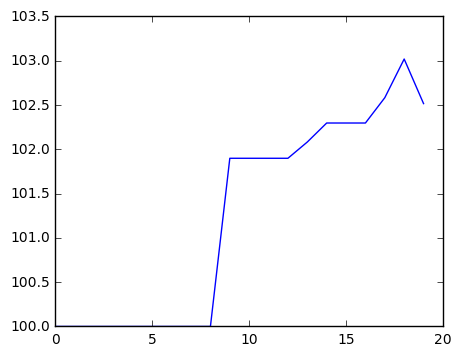

In [10]:
plt.plot(profit[0,:],'b')

#plt.hold(True)
#plt.show()

In [18]:
l=100
nstep=20
window=5
money=100

profit, signal, pred_price = tr.rolltrade(np.array([data]),AR_model,l,nstep,window,money)

signal

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  1.,  0., -1.,  0.,  1.,
         0.,  0., -1.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

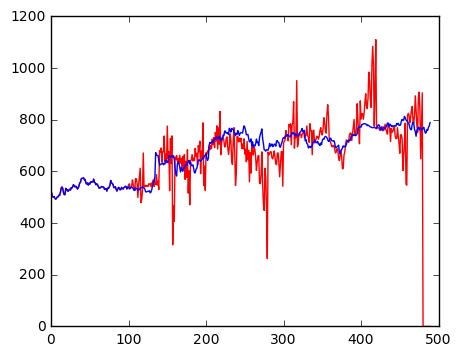

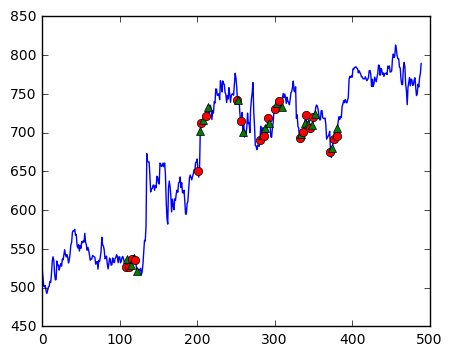

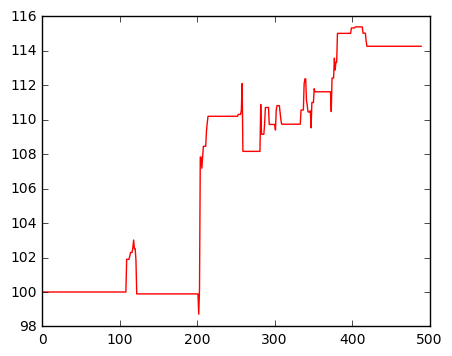

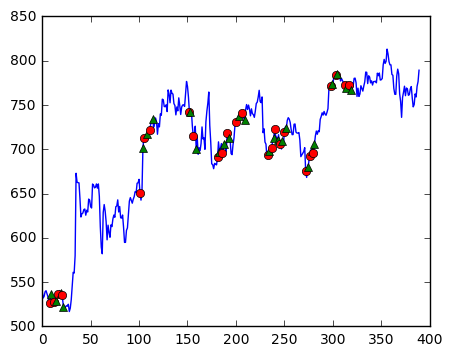

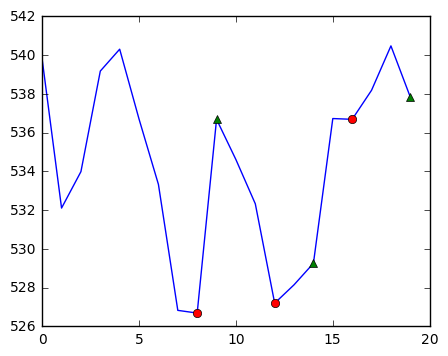

In [50]:
plt.plot(pred_price[0,:],'r')
plt.plot(data,'b')
plt.hold(True)
plt.show()
        
        
plt.figure()
plt.plot(data[0:],'b')
for i in range(data.shape[0]-l):
    if signal[0,i]==1:
        plt.plot(i,data[i],'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[i],'g^')

plt.figure()
plt.plot(profit[0,:],'r')



plt.figure()

plt.plot(data[l:],'b')
for i in range(data.shape[0]-l):
    if signal[0,l+i]==1:
        plt.plot(i,data[l+i],'ro')
    if signal[0,l+i]==-1:
        plt.plot(i,data[l+i],'g^')
        
        
plt.figure()
plt.plot(data[l:l+20],'b')
for i in range(20):
    if signal[0,100+i]==1:
        plt.plot(i,data[100+i],'ro')
    if signal[0,100+i]==-1:
        plt.plot(i,data[100+i],'g^')


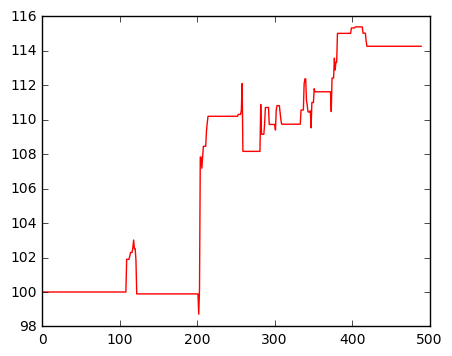

array([ 524.81,  513.87,  501.96,  501.1 ,  502.68,  496.17,  492.55,
        496.18,  500.87,  501.79,  508.08,  506.9 ,  518.04,  534.39,
        539.95,  535.21,  518.63,  510.  ,  510.66,  534.52,  528.48,
        529.24,  522.76,  527.58,  531.  ,  527.83,  536.94,  535.97,
        542.93,  549.01,  542.84,  539.7 ,  542.87,  538.95,  531.91,
        536.09,  543.87,  555.48,  558.4 ,  571.34,  573.64,  573.37,
        575.33,  567.69,  568.85,  555.01,  551.18,  555.51,  547.32,
        554.51,  550.84,  559.5 ,  557.99,  560.36,  558.81,  570.19,
        558.79,  555.17,  548.34,  552.03,  548.  ,  542.56,  535.53,
        536.77,  537.02,  541.61,  540.78,  540.01,  539.17,  530.39,
        532.53,  533.8 ,  524.05,  535.38,  533.97,  539.37,  547.  ,
        565.06,  555.37,  553.68,  549.08,  537.34,  537.9 ,  540.78,
        530.8 ,  524.22,  530.7 ,  538.22,  535.7 ,  529.04,  529.62,
        538.4 ,  533.85,  532.3 ,  537.36,  539.27,  542.51,  540.11,
        532.32,  539